# API Method1

In [13]:
# import requests
# import pandas as pd
# import os

# from dotenv import load_dotenv
# load_dotenv()



# def fetch_data(base_url, dataset, api_key, num_records=99, offset=0):
#     all_records = []
#     max_offset = 9900  # Maximum number of requests

#     while True:
#         # maximum limit check
#         if offset > max_offset:
#             break

#         # Create API request URL
#         filters = f'{dataset}/records?limit={num_records}&offset={offset}'
#         url = f'{base_url}{filters}&api_key={api_key_mop}'

#         # Start request
#         try:
#             result = requests.get(url, timeout=10)
#             result.raise_for_status()
#             records = result.json().get('results')
#         except requests.exceptions.RequestException as e:
#             raise Exception(f"API request failed: {e}")
#         if records is None:
#             break
#         all_records.extend(records)
#         if len(records) < num_records:
#             break

#         # next cycle offset
#         offset += num_records

#     # DataFrame all data
#     df = pd.DataFrame(all_records)
#     return df
    
# API_KEY = os.environ.get("API_KEY_MOP")
# BASE_URL = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'


In [14]:
# # Microclimate Sensor Readings
# CLIMATE_DATASET = 'microclimate-sensor-readings'
# microclimate_readings = fetch_data(BASE_URL, CLIMATE_DATASET, API_KEY)
# microclimate_readings

In [15]:
# #Microclimate Sensor Locations
# SENSOR_LOCATIONS_DATASET = 'microclimate-sensor-locations'
# climate_sensor_locations = fetch_data(BASE_URL, SENSOR_LOCATIONS_DATASET, API_KEY)
# climate_sensor_locations


In [16]:
# #Footpath steepness
# FOOTPATH_STEEPNESS_DATASET = 'footpath-steepness'
# footpath_steepness = fetch_data(BASE_URL, FOOTPATH_STEEPNESS_DATASET, API_KEY)
# footpath_steepness

In [17]:
# #Pedestrian Counting System - Past Hour (counts per minute)
# PEDESTRIAN_DATASET = 'pedestrian-counting-system-past-hour-counts-per-minute'
# pedestraian_count = fetch_data(BASE_URL, PEDESTRIAN_DATASET, API_KEY)
# pedestraian_count

In [18]:
# #Pedestrian Counting System - Sensor Locations
# SENSOR_LOCATIONS_DATASET_2 = 'pedestrian-counting-system-sensor-locations'
# pedestrian_sensor_locations = fetch_data(BASE_URL, SENSOR_LOCATIONS_DATASET_2, API_KEY)
# pedestrian_sensor_locations

In [19]:
# #datasets_url = "?dataset=global-summary-of-the-day"

# #NOAA Dataset

# import requests
# import pandas as pd

# # Define the base URL and parameters
# base_url = "https://www.ncei.noaa.gov/access/services/data/v1"
# datasets_url = "?dataset=daily-summaries"
# station_url = "&stations=ASN00083035,ASN00083052,ASN00083068,ASN00083090,ASN00084010,ASN00084016,ASN00084017,ASN00084022,ASN00084030,ASN00084059,ASN00084073,ASN00084084,ASN00084085,ASN00084114,ASN00084121,ASN00084143,ASN00084144,ASN00084145,ASN00085062,ASN00085072,ASN00085092,ASN00085093,ASN00085106,ASN00085142,ASN00085193,ASN00085242,ASN00085244,ASN00085247,ASN00085279,ASN00085280,ASN00085291,ASN00085296,ASN00086133,ASN00089037"
# startdate_url = "&startDate=2016-01-01"
# enddate_url = "&endDate=2020-12-31"
# options_url = "&options=includeAttributes:true"
# data_format = "&format=json"

# # Construct the full URL
# full_url = f"{base_url}{datasets_url}{station_url}{startdate_url}{enddate_url}{options_url}{data_format}"
# token = "vflMliolsDnHblAoiNDDQgmocEipDpTQ"

# # Make the API call
# headers = {"Authorization": api_key}
# response = requests.get(full_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
#     # Convert the response content to JSON
#     api_json = response.json()
    
#     # Convert JSON to DataFrame
#     api_df = pd.DataFrame(api_json)
    
#     # Select desired columns
#     api_df = api_df[['DATE', 'STATION', 'TMIN', 'TMAX', 'PRCP']]
    
#     # Display the DataFrame
#     print(api_df.head())
# else:
#     print(f"Failed to retrieve data from the API. Status code: {response.status_code}")


# API Method2

# Footpath Steepness dataset

In [20]:
import requests
import pandas as pd
from io import StringIO
import os
from dotenv import load_dotenv
load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'footpath-steepness'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
#GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    footpath_steepness = pd.read_csv(StringIO(url_content), delimiter=';')
    print(footpath_steepness.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

                                  geo_point_2d  \
6939    -37.79574471143112, 144.96611898665378   
5502    -37.79405874885924, 144.91923207306294   
3964     -37.8116034841895, 144.93619726902517   
2188    -37.81233096787389, 144.94983798021042   
18168    -37.81898647829975, 144.9731119892218   
22798  -37.793329132657455, 144.93101088639682   
25768  -37.815410724248984, 144.97501898627218   
29434  -37.815948810282094, 144.94520243270497   
1798     -37.80028365498469, 144.9425828155954   
25796  -37.814073203137156, 144.96011483183653   

                                               geo_shape  grade1in  gradepc  \
6939   {"coordinates": [[[[144.96611896004282, -37.79...      34.3     2.92   
5502   {"coordinates": [[[[144.9192916131847, -37.794...      13.3     7.53   
3964   {"coordinates": [[[[144.93619612562787, -37.81...     273.3     0.37   
2188   {"coordinates": [[[[144.9493548071469, -37.812...      65.6     1.53   
18168  {"coordinates": [[[[144.97310926820472, -37.81.

# pedestrian monthly Counts per hour dataset

In [21]:
import requests
import pandas as pd
from io import StringIO
import os
from dotenv import load_dotenv
load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_count = pd.read_csv(StringIO(url_content), delimiter=';')

    pedestrian_count['timestamp'] = pd.to_datetime(pedestrian_count['timestamp'])
    all_hours = pd.date_range(start=pedestrian_count['timestamp'].min(), end=pedestrian_count['timestamp'].max(), freq='1H')
    all_hours_df = pd.DataFrame({'timestamp': all_hours})
    
    # Merge with original DataFrame to fill in missing rows
    pedestrian_count = pd.merge(all_hours_df, pedestrian_count, on='timestamp', how='left')
    
    # Fill NaN values with 0
    pedestrian_count.fillna(0, inplace=True)
    
    print(pedestrian_count)

    print(pedestrian_count.sample(10, random_state=999)) # Test
    
else:
    print(f'Request failed with status code {response.status_code}')

                       timestamp sensor_name  locationid  direction_1  \
0      2023-03-31 13:00:00+00:00     Col12_T        18.0         13.0   
1      2023-03-31 13:00:00+00:00    LtB210_T        19.0        184.0   
2      2023-03-31 13:00:00+00:00    LtB170_T        20.0         84.0   
3      2023-03-31 13:00:00+00:00    Col620_T        24.0        126.0   
4      2023-03-31 13:00:00+00:00       Vic_T        27.0         37.0   
...                          ...         ...         ...          ...   
550930 2024-03-18 14:00:00+00:00   Fli114F_T       117.0          6.0   
550931 2024-03-18 14:00:00+00:00     King2_T       131.0         19.0   
550932 2024-03-18 14:00:00+00:00   Spen229_T       133.0         24.0   
550933 2024-03-18 14:00:00+00:00   Spen201_T       134.0         19.0   
550934 2024-03-18 14:00:00+00:00   Spen161_T       135.0         10.0   

        direction_2  total_of_directions                    location  
0               8.0                 21.0  -37.813448

In [22]:
all_hours

DatetimeIndex(['2023-03-31 13:00:00+00:00', '2023-03-31 14:00:00+00:00',
               '2023-03-31 15:00:00+00:00', '2023-03-31 16:00:00+00:00',
               '2023-03-31 17:00:00+00:00', '2023-03-31 18:00:00+00:00',
               '2023-03-31 19:00:00+00:00', '2023-03-31 20:00:00+00:00',
               '2023-03-31 21:00:00+00:00', '2023-03-31 22:00:00+00:00',
               ...
               '2024-03-18 05:00:00+00:00', '2024-03-18 06:00:00+00:00',
               '2024-03-18 07:00:00+00:00', '2024-03-18 08:00:00+00:00',
               '2024-03-18 09:00:00+00:00', '2024-03-18 10:00:00+00:00',
               '2024-03-18 11:00:00+00:00', '2024-03-18 12:00:00+00:00',
               '2024-03-18 13:00:00+00:00', '2024-03-18 14:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=8474, freq='H')

In [23]:
zero_count = (pedestrian_count == 0).sum()
zero_count

timestamp                  0
sensor_name              959
locationid               959
direction_1            11404
direction_2            11175
total_of_directions      959
location                 959
dtype: int64

# pedestrian Couting system location dataset

In [24]:
from dotenv import load_dotenv
load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'pedestrian-counting-system-sensor-locations'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_sensor_locations = pd.read_csv(StringIO(url_content), delimiter=';')
    print(pedestrian_sensor_locations.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

     location_id                                 sensor_description  \
91             4                                   Town Hall (West)   
37           158                               514 Elizebeth Street   
0             24                      Spencer St-Collins St (North)   
28           110                          Birrarung Marr East Entry   
97            19                      Chinatown-Swanston St (North)   
26           107                           Flagstaff station (East)   
134          151  narrm ngarrgu Library - Level 2 - Collections ...   
108           54                            Lincoln-Swanston (West)   
99            26                      QV Market-Elizabeth St (West)   
89           155  narrm ngarrgu Library - Level 3 Children's Lib...   

       sensor_name installation_date                         note  \
91        Swa123_T        2009-03-23                          NaN   
37        Eli514_T        2024-01-29                          NaN   
0         C

# merge pedestrian counts and locations

In [25]:
pedestrian_merged_data = pd.merge(pedestrian_count, pedestrian_sensor_locations, left_on='locationid', right_on='location_id', how='inner')
pedestrian_merged_data
# pedestrian_merged_data.info()
# print(type(pedestrian_merged_data.timestamp[0]))
# pedestrian_merged_data['timestamp'] = pd.to_datetime(pedestrian_merged_data['timestamp'])
# print(type(pedestrian_merged_data.timestamp[0]))

pedestrian_merged_data.sort_values(by='timestamp',ascending=False)
# print(pedestrian_merged_data)

,timestamp,sensor_name_x,locationid,direction_1_x,direction_2_x,total_of_directions,location_x,location_id,sensor_description,sensor_name_y,installation_date,note,location_type,status,direction_1_y,direction_2_y,latitude,longitude,location_y
41535,2024-03-18 14:00:00+00:00,Lon189_T,30.0,17.0,28.0,45.0,"-37.8112185, 144.96656806",30,Lonsdale St (South),Lon189_T,2013-10-14,"Pushbox Upgrade, 20/07/2023",Outdoor,A,East,West,-37.811219,144.966568,"-37.8112185, 144.96656806"
68271,2024-03-18 14:00:00+00:00,Spr201_T,40.0,4.0,7.0,11.0,"-37.80999341, 144.97227587",40,Lonsdale St-Spring St (West),Spr201_T,2015-01-19,"Pushbox Upgrade, 03/08/2023",Outdoor,A,North,South,-37.809993,144.972276,"-37.80999341, 144.97227587"
536417,2024-03-18 14:00:00+00:00,474Fl_T,141.0,5.0,15.0,20.0,"-37.81997273, 144.95834911",141,Awning of Nationwide Parking 474 Flinders Street,474Fl_T,2023-11-10,NaN,Outdoor,A,East,West,-37.819973,144.958349,"-37.81997273, 144.95834911"
197619,2024-03-18 14:00:00+00:00,RMIT_T,59.0,29.0,16.0,45.0,"-37.80825648, 144.96304859",59,Building 80 RMIT,RMIT_T,2019-02-13,NaN,Outdoor,A,North,South,-37.808256,144.963049,"-37.80825648, 144.96304859"
449627,2024-03-18 14:00:00+00:00,574Qub_T,86.0,0.0,1.0,1.0,"-37.80309992, 144.94908064",86,Queensberry St - Errol St (South),574Qub_T,2021-12-21,NaN,Outdoor,A,East,West,-37.803100,144.949081,"-37.80309992, 144.94908064"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332733,2023-03-31 13:00:00+00:00,AG_T,29.0,14.0,54.0,68.0,"-37.81965809, 144.96863453",29,St Kilda Rd-Alexandra Gardens,AG_T,2013-10-11,sensor upgraded from laser to 3D on 19/12/2019,Outdoor,A,North,South,-37.819658,144.968635,"-37.81965809, 144.96863453"
219846,2023-03-31 13:00:00+00:00,PriNW_T,5.0,251.0,340.0,591.0,"-37.81874249, 144.96787656",5,Princes Bridge,PriNW_T,2009-03-26,Replace with: 00:6e:02:01:9e:54,Outdoor,A,North,South,-37.818742,144.967877,"-37.81874249, 144.96787656"
212852,2023-03-31 13:00:00+00:00,Swa123_T,4.0,406.0,497.0,903.0,"-37.81487988, 144.9660878",4,Town Hall (West),Swa123_T,2009-03-23,NaN,Outdoor,A,North,South,-37.814880,144.966088,"-37.81487988, 144.9660878"
55896,2023-03-31 13:00:00+00:00,Lyg260_T,37.0,32.0,40.0,72.0,"-37.80310271, 144.96671451",37,Lygon St (East),Lyg260_T,2015-02-11,"Pushbox Upgrade, 30/06/2023",Outdoor,A,North,South,-37.803103,144.966715,"-37.80310271, 144.96671451"


In [26]:
# Convert 'timestamp' column to datetime if needed
pedestrian_merged_data['timestamp'] = pd.to_datetime(pedestrian_merged_data['timestamp'])

# Find the earliest and latest timestamps
earliest_timestamp = pedestrian_merged_data['timestamp'].min()
latest_timestamp = pedestrian_merged_data['timestamp'].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)


Earliest Timestamp: 2023-03-31 13:00:00+00:00
Latest Timestamp: 2024-03-18 14:00:00+00:00


# filter data by date

In [27]:
import pandas as pd

# Assuming pedestrian_merged_data is your DataFrame containing the pedestrian data

# Define the start and end dates for filtering
start_date = pd.to_datetime('2024-01-02').date()
end_date = pd.to_datetime('2024-03-18').date()

# Convert 'timestamp' column to datetime if it's not already
pedestrian_merged_data['timestamp'] = pd.to_datetime(pedestrian_merged_data['timestamp'])

# Extract date from 'timestamp' column
pedestrian_merged_data['date_only'] = pedestrian_merged_data['timestamp'].dt.date

# Dictionary to store filtered DataFrames
filtered_data_dfs = {}

# Iterate over dates in 7-day intervals and filter data
current_date = start_date
week_number = 1
while current_date <= end_date:
    # Define the end date of the current 7-day period
    period_end_date = current_date + pd.Timedelta(days=6)  # 6 days later
    
    # Define the name for the DataFrame
    month_name = current_date.strftime('%B')
    df_name = f"{month_name}_{week_number}"
    
    # Filter the combined data DataFrame by date range
    filtered_data_dfs[df_name] = pedestrian_merged_data[
        (pedestrian_merged_data['date_only'] >= current_date) & 
        (pedestrian_merged_data['date_only'] <= period_end_date)
    ]
    
    # Move to the next 7-day period
    current_date += pd.Timedelta(days=7)
    week_number += 1

# Now, filtered_data_dfs contains DataFrames for each 7-day period within the specified range,
# and they are accessible using the formatted name, e.g., filtered_data_dfs['January_1'], filtered_data_dfs['January_2'], and so on.


In [172]:
import datetime

# Define an empty list to store keys within the date range
keys_within_date_range = []

# Iterate over the keys of filtered_data_dfs and select only those keys within the specified date range
for key in filtered_data_dfs.keys():
    month, week = key.split('_')
    week_start_date = datetime.datetime.strptime(f"{month} {week.split()[0]} {start_date.year}", '%B %d %Y').date()
    week_end_date = week_start_date + datetime.timedelta(days=6)
    if week_start_date >= start_date and week_end_date <= end_date:
        keys_within_date_range.append(key)

# Now, keys_within_date_range contains the keys representing month names and week numbers that fall within the specified date range.


In [173]:
import pandas as pd

# Get all keys from the filtered_data_dfs dictionary
all_keys = list(filtered_data_dfs.keys())

# Create a DataFrame with the keys
keys_df = pd.DataFrame(all_keys, columns=['Keys'])

# Print the DataFrame
print(keys_df)


          Keys
0    January_1
1    January_2
2    January_3
3    January_4
4    January_5
5   February_6
6   February_7
7   February_8
8   February_9
9     March_10
10    March_11
11    March_12
12    March_13


In [128]:
filtered_data_dfs['January_3']

,timestamp,sensor_name_x,locationid,direction_1_x,direction_2_x,total_of_directions,location_x,location_id,sensor_description,sensor_name_y,installation_date,note,location_type,status,direction_1_y,direction_2_y,latitude,longitude,location_y,date_only
5158,2024-01-16 00:00:00+00:00,Col12_T,18.0,144.0,202.0,346.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-16
5159,2024-01-16 01:00:00+00:00,Col12_T,18.0,216.0,248.0,464.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-16
5160,2024-01-16 02:00:00+00:00,Col12_T,18.0,239.0,293.0,532.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-16
5161,2024-01-16 03:00:00+00:00,Col12_T,18.0,172.0,173.0,345.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-16
5162,2024-01-16 04:00:00+00:00,Col12_T,18.0,305.0,115.0,420.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544084,2024-01-22 19:00:00+00:00,Boyd2837_T,140.0,29.0,8.0,37.0,"-37.82590962, 144.96185972",140,COM Pole 2837 - Boyd Park,Boyd2837_T,2023-11-02,NaN,Outdoor,A,North,South,-37.825910,144.961860,"-37.82590962, 144.96185972",2024-01-22
544085,2024-01-22 20:00:00+00:00,Boyd2837_T,140.0,89.0,34.0,123.0,"-37.82590962, 144.96185972",140,COM Pole 2837 - Boyd Park,Boyd2837_T,2023-11-02,NaN,Outdoor,A,North,South,-37.825910,144.961860,"-37.82590962, 144.96185972",2024-01-22
544086,2024-01-22 21:00:00+00:00,Boyd2837_T,140.0,175.0,21.0,196.0,"-37.82590962, 144.96185972",140,COM Pole 2837 - Boyd Park,Boyd2837_T,2023-11-02,NaN,Outdoor,A,North,South,-37.825910,144.961860,"-37.82590962, 144.96185972",2024-01-22
544087,2024-01-22 22:00:00+00:00,Boyd2837_T,140.0,174.0,35.0,209.0,"-37.82590962, 144.96185972",140,COM Pole 2837 - Boyd Park,Boyd2837_T,2023-11-02,NaN,Outdoor,A,North,South,-37.825910,144.961860,"-37.82590962, 144.96185972",2024-01-22


# Choosing the week number

In [174]:
# Suppose you want to select the time frame corresponding to the third key in keys_df
selected_key = keys_df.iloc[2]['Keys']  # 'January_3'

# Use the selected key to access the corresponding DataFrame from filtered_data_dfs
filtered_pedestrian_merged_data = filtered_data_dfs[selected_key]

# Now you can perform operations on the selected DataFrame
filtered_pedestrian_merged_data.head(40)


,timestamp,sensor_name_x,locationid,direction_1_x,direction_2_x,total_of_directions,location_x,location_id,sensor_description,sensor_name_y,installation_date,note,location_type,status,direction_1_y,direction_2_y,latitude,longitude,location_y,date_only
5135,2024-01-15 00:00:00+00:00,Col12_T,18.0,173.0,194.0,367.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15
5136,2024-01-15 01:00:00+00:00,Col12_T,18.0,188.0,201.0,389.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15
5137,2024-01-15 02:00:00+00:00,Col12_T,18.0,219.0,227.0,446.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15
5138,2024-01-15 03:00:00+00:00,Col12_T,18.0,199.0,139.0,338.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15
5139,2024-01-15 04:00:00+00:00,Col12_T,18.0,254.0,104.0,358.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15
5140,2024-01-15 05:00:00+00:00,Col12_T,18.0,495.0,87.0,582.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15
5141,2024-01-15 06:00:00+00:00,Col12_T,18.0,783.0,71.0,854.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15
5142,2024-01-15 07:00:00+00:00,Col12_T,18.0,233.0,53.0,286.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15
5143,2024-01-15 08:00:00+00:00,Col12_T,18.0,104.0,29.0,133.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15
5144,2024-01-15 09:00:00+00:00,Col12_T,18.0,39.0,20.0,59.0,"-37.81344862, 144.97305353",18,Collins Place (North),Col12_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813449,144.973054,"-37.81344862, 144.97305353",2024-01-15


In [ ]:
# Initialize an empty dictionary to store the DataFrames
filtered_pedestrian_merged_data = {}

# Iterate through each row in keys_df
for index, row in keys_df.iterrows():
    # Get the key value from the current row
    selected_key = row['Keys']
    
    # Use the selected key to access the corresponding DataFrame from filtered_data_dfs
    filtered_pedestrian_merged_data[selected_key] = filtered_data_dfs[selected_key]

# Now you have a dictionary of DataFrames where keys are the keys from keys_df
# and values are corresponding DataFrames from filtered_data_dfs

# You can access each DataFrame using the key, for example:
filtered_pedestrian_merged_data['January_3'].head(40)


# drop unwanted columns

In [176]:
filtered_pedestrian_merged_data = filtered_pedestrian_merged_data.reindex(columns=['timestamp','location_id', 'latitude', 'longitude', 'direction_1_x', 'direction_2_x', 'total_of_directions', 'direction_1_y', 'direction_2_y', 'date_only'])
print(filtered_pedestrian_merged_data)
filtered_pedestrian_merged_data.head(40)


                       timestamp  location_id   latitude   longitude  \
5135   2024-01-15 00:00:00+00:00           18 -37.813449  144.973054   
5136   2024-01-15 01:00:00+00:00           18 -37.813449  144.973054   
5137   2024-01-15 02:00:00+00:00           18 -37.813449  144.973054   
5138   2024-01-15 03:00:00+00:00           18 -37.813449  144.973054   
5139   2024-01-15 04:00:00+00:00           18 -37.813449  144.973054   
...                          ...          ...        ...         ...   
544069 2024-01-21 19:00:00+00:00          140 -37.825910  144.961860   
544070 2024-01-21 20:00:00+00:00          140 -37.825910  144.961860   
544071 2024-01-21 21:00:00+00:00          140 -37.825910  144.961860   
544072 2024-01-21 22:00:00+00:00          140 -37.825910  144.961860   
544073 2024-01-21 23:00:00+00:00          140 -37.825910  144.961860   

        direction_1_x  direction_2_x  total_of_directions direction_1_y  \
5135            173.0          194.0                367.0   

,timestamp,location_id,latitude,longitude,direction_1_x,direction_2_x,total_of_directions,direction_1_y,direction_2_y,date_only
5135,2024-01-15 00:00:00+00:00,18,-37.813449,144.973054,173.0,194.0,367.0,East,West,2024-01-15
5136,2024-01-15 01:00:00+00:00,18,-37.813449,144.973054,188.0,201.0,389.0,East,West,2024-01-15
5137,2024-01-15 02:00:00+00:00,18,-37.813449,144.973054,219.0,227.0,446.0,East,West,2024-01-15
5138,2024-01-15 03:00:00+00:00,18,-37.813449,144.973054,199.0,139.0,338.0,East,West,2024-01-15
5139,2024-01-15 04:00:00+00:00,18,-37.813449,144.973054,254.0,104.0,358.0,East,West,2024-01-15
5140,2024-01-15 05:00:00+00:00,18,-37.813449,144.973054,495.0,87.0,582.0,East,West,2024-01-15
5141,2024-01-15 06:00:00+00:00,18,-37.813449,144.973054,783.0,71.0,854.0,East,West,2024-01-15
5142,2024-01-15 07:00:00+00:00,18,-37.813449,144.973054,233.0,53.0,286.0,East,West,2024-01-15
5143,2024-01-15 08:00:00+00:00,18,-37.813449,144.973054,104.0,29.0,133.0,East,West,2024-01-15
5144,2024-01-15 09:00:00+00:00,18,-37.813449,144.973054,39.0,20.0,59.0,East,West,2024-01-15


# filter latitude and longitude columns for API requesting purpose

In [131]:
pedestrian_latitude = filtered_pedestrian_merged_data['latitude'].values[0]
pedestrian_longitude = filtered_pedestrian_merged_data['longitude'].values[0]

# Request climate data through API using latitude and longitude data

In [132]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

def get_climate_data(latitude, longitude):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": pedestrian_latitude,
        "longitude": pedestrian_longitude,
        "current": "relative_humidity_2m",
        "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "rain", "showers", "weather_code", "uv_index"],
        "past_days": 92
    }
    responses = openmeteo.weather_api(url, params=params)

    # Process first location. Add a for-loop for multiple locations or weather models
    response = responses[0]

    # Process hourly data
    hourly = response.Hourly()
    hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
    hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
    hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
    hourly_rain = hourly.Variables(3).ValuesAsNumpy()
    hourly_showers = hourly.Variables(4).ValuesAsNumpy()
    hourly_weather_code = hourly.Variables(5).ValuesAsNumpy()
    hourly_uv_index = hourly.Variables(6).ValuesAsNumpy()

    hourly_data = {
        "latitude": latitude,
        "longitude": longitude,
        "date": pd.date_range(
            start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
            end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=hourly.Interval()),
            inclusive="left"
        ),
        "temperature_2m": hourly_temperature_2m,
        "relative_humidity_2m": hourly_relative_humidity_2m,
        "precipitation": hourly_precipitation,
        "rain": hourly_rain,
        "showers": hourly_showers,
        "weather_code": hourly_weather_code,
        "uv_index": hourly_uv_index
    }

    hourly_dataframe = pd.DataFrame(data=hourly_data)
    return hourly_dataframe


# Initialize an empty list to store all climate dataframes
all_climate_data = []

# Iterate over each location and retrieve climate data
for index, row in filtered_pedestrian_merged_data.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
   
    climate_data = get_climate_data(latitude, longitude)
    all_climate_data.append(climate_data)

# Concatenate all climate dataframes into a single dataframe
climate_data_combined = pd.concat(all_climate_data, ignore_index=True)

# Print the combined climate data

climate_data_combined = climate_data_combined.rename(columns={'date': 'timestamp'})
climate_data_combined

,latitude,longitude,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index
0,-37.813449,144.973054,2024-01-09 00:00:00+00:00,21.711000,64.0,0.0,0.0,0.0,2.0,3.00
1,-37.813449,144.973054,2024-01-09 01:00:00+00:00,23.211000,58.0,0.0,0.0,0.0,2.0,7.50
2,-37.813449,144.973054,2024-01-09 02:00:00+00:00,23.861000,58.0,0.0,0.0,0.0,1.0,8.95
3,-37.813449,144.973054,2024-01-09 03:00:00+00:00,24.111000,57.0,0.0,0.0,0.0,1.0,9.30
4,-37.813449,144.973054,2024-01-09 04:00:00+00:00,24.561001,55.0,0.0,0.0,0.0,1.0,8.90
...,...,...,...,...,...,...,...,...,...,...
31201627,-37.825910,144.961860,2024-04-16 19:00:00+00:00,12.861000,73.0,0.0,0.0,0.0,2.0,0.00
31201628,-37.825910,144.961860,2024-04-16 20:00:00+00:00,12.511001,73.0,0.0,0.0,0.0,2.0,0.00
31201629,-37.825910,144.961860,2024-04-16 21:00:00+00:00,12.411000,72.0,0.0,0.0,0.0,2.0,0.00
31201630,-37.825910,144.961860,2024-04-16 22:00:00+00:00,12.911000,70.0,0.0,0.0,0.0,2.0,0.30


# Check the time range

In [133]:
# Convert 'timestamp' column to datetime if needed
climate_data_combined['timestamp'] = pd.to_datetime(climate_data_combined['timestamp'])

# Find the earliest and latest timestamps
earliest_timestamp = climate_data_combined['timestamp'].min()
latest_timestamp = climate_data_combined['timestamp'].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

Earliest Timestamp: 2024-01-09 00:00:00+00:00
Latest Timestamp: 2024-04-16 23:00:00+00:00


# merge pedestrian dataset with climate dataset on timestamp and location data

In [134]:
merged_df = pd.merge(filtered_pedestrian_merged_data, climate_data_combined, on=['timestamp', 'latitude', 'longitude'], how='left')
merged_df = merged_df.drop_duplicates()
print(merged_df)
merged_df.head(40)

                        timestamp  location_id   latitude   longitude  \
0       2024-01-16 00:00:00+00:00           18 -37.813449  144.973054   
160     2024-01-16 01:00:00+00:00           18 -37.813449  144.973054   
320     2024-01-16 02:00:00+00:00           18 -37.813449  144.973054   
480     2024-01-16 03:00:00+00:00           18 -37.813449  144.973054   
640     2024-01-16 04:00:00+00:00           18 -37.813449  144.973054   
...                           ...          ...        ...         ...   
2141396 2024-01-22 19:00:00+00:00          140 -37.825910  144.961860   
2141502 2024-01-22 20:00:00+00:00          140 -37.825910  144.961860   
2141608 2024-01-22 21:00:00+00:00          140 -37.825910  144.961860   
2141714 2024-01-22 22:00:00+00:00          140 -37.825910  144.961860   
2141820 2024-01-22 23:00:00+00:00          140 -37.825910  144.961860   

         direction_1_x  direction_2_x  total_of_directions direction_1_y  \
0                144.0          202.0          

,timestamp,location_id,latitude,longitude,direction_1_x,direction_2_x,total_of_directions,direction_1_y,direction_2_y,date_only,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index
0,2024-01-16 00:00:00+00:00,18,-37.813449,144.973054,144.0,202.0,346.0,East,West,2024-01-16,26.861000,44.0,0.0,0.0,0.0,0.0,6.15
160,2024-01-16 01:00:00+00:00,18,-37.813449,144.973054,216.0,248.0,464.0,East,West,2024-01-16,28.361000,41.0,0.0,0.0,0.0,0.0,7.70
320,2024-01-16 02:00:00+00:00,18,-37.813449,144.973054,239.0,293.0,532.0,East,West,2024-01-16,29.661001,39.0,0.0,0.0,0.0,0.0,8.75
480,2024-01-16 03:00:00+00:00,18,-37.813449,144.973054,172.0,173.0,345.0,East,West,2024-01-16,30.661001,37.0,0.0,0.0,0.0,1.0,9.10
640,2024-01-16 04:00:00+00:00,18,-37.813449,144.973054,305.0,115.0,420.0,East,West,2024-01-16,31.461000,35.0,0.0,0.0,0.0,0.0,8.75
800,2024-01-16 05:00:00+00:00,18,-37.813449,144.973054,545.0,95.0,640.0,East,West,2024-01-16,31.911001,33.0,0.0,0.0,0.0,1.0,7.75
960,2024-01-16 06:00:00+00:00,18,-37.813449,144.973054,966.0,80.0,1046.0,East,West,2024-01-16,31.111000,38.0,0.0,0.0,0.0,0.0,6.20
1120,2024-01-16 07:00:00+00:00,18,-37.813449,144.973054,262.0,68.0,330.0,East,West,2024-01-16,30.611000,40.0,0.0,0.0,0.0,0.0,4.35
1280,2024-01-16 08:00:00+00:00,18,-37.813449,144.973054,113.0,43.0,156.0,East,West,2024-01-16,30.011000,41.0,0.0,0.0,0.0,1.0,2.45
1440,2024-01-16 09:00:00+00:00,18,-37.813449,144.973054,35.0,28.0,63.0,East,West,2024-01-16,28.811001,45.0,0.0,0.0,0.0,0.0,0.95


In [135]:
# Convert 'timestamp' column to datetime if needed
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Find the earliest and latest timestamps
earliest_timestamp = merged_df['timestamp'].min()
latest_timestamp = merged_df['timestamp'].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

Earliest Timestamp: 2024-01-16 00:00:00+00:00
Latest Timestamp: 2024-01-22 23:00:00+00:00


# drop unwanted column

In [136]:
columns_to_drop = [8]
merged_df = merged_df.drop(columns=merged_df.columns[columns_to_drop])

merged_df.head(40)

,timestamp,location_id,latitude,longitude,direction_1_x,direction_2_x,total_of_directions,direction_1_y,date_only,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index
0,2024-01-16 00:00:00+00:00,18,-37.813449,144.973054,144.0,202.0,346.0,East,2024-01-16,26.861000,44.0,0.0,0.0,0.0,0.0,6.15
160,2024-01-16 01:00:00+00:00,18,-37.813449,144.973054,216.0,248.0,464.0,East,2024-01-16,28.361000,41.0,0.0,0.0,0.0,0.0,7.70
320,2024-01-16 02:00:00+00:00,18,-37.813449,144.973054,239.0,293.0,532.0,East,2024-01-16,29.661001,39.0,0.0,0.0,0.0,0.0,8.75
480,2024-01-16 03:00:00+00:00,18,-37.813449,144.973054,172.0,173.0,345.0,East,2024-01-16,30.661001,37.0,0.0,0.0,0.0,1.0,9.10
640,2024-01-16 04:00:00+00:00,18,-37.813449,144.973054,305.0,115.0,420.0,East,2024-01-16,31.461000,35.0,0.0,0.0,0.0,0.0,8.75
800,2024-01-16 05:00:00+00:00,18,-37.813449,144.973054,545.0,95.0,640.0,East,2024-01-16,31.911001,33.0,0.0,0.0,0.0,1.0,7.75
960,2024-01-16 06:00:00+00:00,18,-37.813449,144.973054,966.0,80.0,1046.0,East,2024-01-16,31.111000,38.0,0.0,0.0,0.0,0.0,6.20
1120,2024-01-16 07:00:00+00:00,18,-37.813449,144.973054,262.0,68.0,330.0,East,2024-01-16,30.611000,40.0,0.0,0.0,0.0,0.0,4.35
1280,2024-01-16 08:00:00+00:00,18,-37.813449,144.973054,113.0,43.0,156.0,East,2024-01-16,30.011000,41.0,0.0,0.0,0.0,1.0,2.45
1440,2024-01-16 09:00:00+00:00,18,-37.813449,144.973054,35.0,28.0,63.0,East,2024-01-16,28.811001,45.0,0.0,0.0,0.0,0.0,0.95


In [137]:
zero_count = (merged_df == 0).sum()
zero_count

timestamp                   0
location_id                 0
latitude                    0
longitude                   0
direction_1_x             279
direction_2_x             270
total_of_directions         0
direction_1_y               0
date_only                   0
temperature_2m              0
relative_humidity_2m        0
precipitation           12149
rain                    12587
showers                 12149
weather_code             1659
uv_index                 4663
dtype: int64

In [138]:
nan_count = merged_df.isna().sum()
nan_count

timestamp               0
location_id             0
latitude                0
longitude               0
direction_1_x           0
direction_2_x           0
total_of_directions     0
direction_1_y           0
date_only               0
temperature_2m          0
relative_humidity_2m    0
precipitation           0
rain                    0
showers                 0
weather_code            0
uv_index                0
dtype: int64

In [139]:
import folium

# Create a base map centered around Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=15)

# Filter out duplicate latitude and longitude coordinates
unique_coordinates = merged_df[['latitude', 'longitude']].drop_duplicates().values.tolist()

# Add unique coordinates as markers on the map
for lat, lon in unique_coordinates:
    folium.Marker(location=[lat, lon]).add_to(melbourne_map)

# Save the map to an HTML file
melbourne_map.save("melbourne_map_with_unique_coordinates.html")
melbourne_map

# Total of Directions Heat Map

In [140]:
import folium
import pandas as pd
from folium.plugins import HeatMap
from ipywidgets import interact, widgets

# Function to update the map based on the selected date
def update_map(selected_date):
    selected_day_df = merged_df[merged_df['timestamp'].dt.date == selected_date]
    pedestrian_data = selected_day_df[['latitude', 'longitude', 'total_of_directions']].values.tolist()
    
    # Create base map centered around Melbourne
    melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=16)

    # Add heatmap layer using pedestrian data
    HeatMap(pedestrian_data).add_to(melbourne_map)

    # Save the map as HTML
    melbourne_map.save("melbourne_heatmap.html")
    display(melbourne_map)

# Create a widget to select the date
date_picker = widgets.DatePicker(description='Select Date', disabled=False)

# Display the time range
print("Time Range:")
print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

# Display the widget and the interactive map
#display(date_picker)
interact(update_map, selected_date=date_picker);


Time Range:
Earliest Timestamp: 2024-01-16 00:00:00+00:00
Latest Timestamp: 2024-01-22 23:00:00+00:00


interactive(children=(DatePicker(value=None, description='Select Date', step=1), Output()), _dom_classes=('wid…

# HeatMap with Climate Data

In [141]:
import folium
import pandas as pd
from folium.plugins import HeatMap
from ipywidgets import interact, widgets

# Function to update the map based on the selected date
def update_map(selected_date):
    # Filter data for the selected date
    selected_day_df = merged_df[merged_df['timestamp'].dt.date == selected_date]
    
    # Extract pedestrian data
    pedestrian_data = selected_day_df[['latitude', 'longitude', 'total_of_directions']].values.tolist()
    
    # Create base map centered around Melbourne
    melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=16)
    
    # Add heatmap layer for pedestrian data
    HeatMap(pedestrian_data, name='Pedestrian Heatmap').add_to(melbourne_map)
    
    # Add climate data layers
    climate_layers = {
        'Relative Humidity 2m': 'relative_humidity_2m',
        'Precipitation': 'precipitation',
        'Rain': 'rain',
        'Showers': 'showers',
        'UV Index': 'uv_index'
    }
    
    for layer_name, layer_column in climate_layers.items():
        climate_data = selected_day_df[['latitude', 'longitude', layer_column]].values.tolist()
        HeatMap(climate_data, name=layer_name).add_to(melbourne_map)

    # Add layer control
    folium.LayerControl().add_to(melbourne_map)

    # Save the map as HTML
    melbourne_map.save("melbourne_heatmap.html")
    display(melbourne_map)

merged_df.dropna(inplace=True)

# Get unique dates from the DataFrame
unique_dates = merged_df['timestamp'].dt.date.unique()

# Create a widget to select the date
date_picker = widgets.DatePicker(description='Select Date', disabled=False)


# Display the time range
print("Time Range:")
print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

# Display the widget and the interactive map
#display(date_picker)
interact(update_map, selected_date=date_picker);



Time Range:
Earliest Timestamp: 2024-01-16 00:00:00+00:00
Latest Timestamp: 2024-01-22 23:00:00+00:00


interactive(children=(DatePicker(value=None, description='Select Date', step=1), Output()), _dom_classes=('wid…

In [142]:
from IPython.display import HTML

# Define the HTML code for the map
html_code = """
<iframe src="https://data.melbourne.vic.gov.au/explore/embed/dataset/footpath-steepness/map/?location=16,-37.81284,144.95249&basemap=mbs-7a7333" width="1100" height="600" frameborder="0"></iframe>
"""

# Display the map in the notebook
HTML(html_code)


## Check NAN Values

In [143]:
# import flatgeobuf

# # Specify the path to your FGB file
# file_path = 'C:\\Users\\Dinuk Nadishan\\Documents\\GitHub\\MOP-Code-Titanium\\Playground\\Dinuk_Workspace\\footpath-steepness@melbournetestbed.fgb'

# # Open the FGB file
# with open(file_path, 'rb') as f:
#     # Read the FGB file
#     fgb_data = flatgeobuf.load(f)

# # Now you can work with the data as needed
# fgb_data

In [144]:

# Check for NaN values
nan_values = merged_df.isna().sum()

# Calculate proportion of NaN values
nan_proportion = nan_values / len(merged_df)

print("NaN Values:")
print(nan_values)
print("\nProportion of NaN Values:")
print(nan_proportion)

NaN Values:
timestamp               0
location_id             0
latitude                0
longitude               0
direction_1_x           0
direction_2_x           0
total_of_directions     0
direction_1_y           0
date_only               0
temperature_2m          0
relative_humidity_2m    0
precipitation           0
rain                    0
showers                 0
weather_code            0
uv_index                0
dtype: int64

Proportion of NaN Values:
timestamp               0.0
location_id             0.0
latitude                0.0
longitude               0.0
direction_1_x           0.0
direction_2_x           0.0
total_of_directions     0.0
direction_1_y           0.0
date_only               0.0
temperature_2m          0.0
relative_humidity_2m    0.0
precipitation           0.0
rain                    0.0
showers                 0.0
weather_code            0.0
uv_index                0.0
dtype: float64


In [145]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a heatmap of missing values
# plt.figure(figsize=(10, 6))
# sns.heatmap(merged_df.isnull(), cmap='viridis', cbar=False)
# plt.title('Missing Values Heatmap')
# plt.xlabel('Columns')
# plt.ylabel('Rows')
# plt.show()


In [146]:
# Calculate summary statistics of NaN values
nan_dispersion = merged_df.isnull().sum().describe()
print(nan_dispersion)

count    16.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64


In [147]:
# Drop NaN values
cleaned_df = merged_df.dropna()

# Summary statistics of the available data
summary = cleaned_df.describe()

# Print the summary statistics
print(summary)


        location_id      latitude     longitude  direction_1_x  direction_2_x  \
count  13132.000000  13132.000000  13132.000000   13132.000000   13132.000000   
mean      61.107067    -37.813383    144.960558     209.844121     202.794091   
std       41.882485      0.006526      0.009481     318.010069     301.344159   
min        2.000000    -37.825910    144.929734       0.000000       0.000000   
25%       27.000000    -37.818414    144.954527      19.000000      20.000000   
50%       54.000000    -37.814716    144.963091      88.000000      87.500000   
75%       85.000000    -37.811015    144.966756     255.000000     251.000000   
max      142.000000    -37.794324    144.974677    3084.000000    3564.000000   

       total_of_directions  temperature_2m  relative_humidity_2m  \
count         13132.000000    13132.000000          13132.000000   
mean            412.638212       18.868896             65.213829   
std             589.890750        4.437838             14.705508  

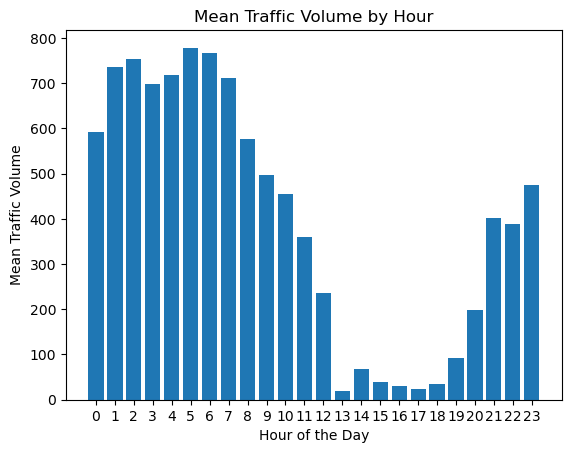

In [148]:
import matplotlib.pyplot as plt

# Convert 'timestamp' column to datetime format
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Extract hour from timestamp
merged_df['hour'] = merged_df['timestamp'].dt.hour

# Group data by hour and calculate mean traffic volume
hourly_traffic = merged_df.groupby('hour')['total_of_directions'].mean()

# Plot bar chart
plt.bar(hourly_traffic.index, hourly_traffic.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Traffic Volume')
plt.title('Mean Traffic Volume by Hour')
plt.xticks(range(24))
plt.show()


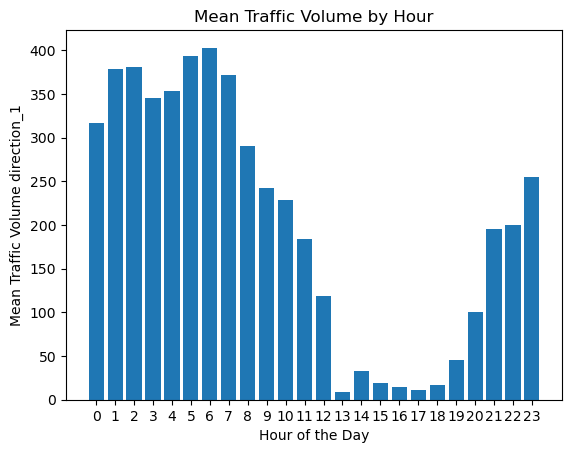

In [149]:
# Convert 'timestamp' column to datetime format
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Extract hour from timestamp
merged_df['hour'] = merged_df['timestamp'].dt.hour

# Group data by hour and calculate mean traffic volume
hourly_traffic = merged_df.groupby('hour')['direction_1_x'].mean()

# Plot bar chart
plt.bar(hourly_traffic.index, hourly_traffic.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Traffic Volume direction_1')
plt.title('Mean Traffic Volume by Hour')
plt.xticks(range(24))
plt.show()


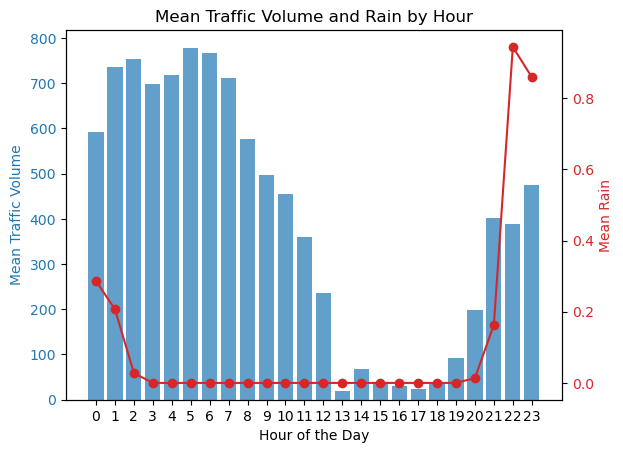

In [150]:

# Convert 'timestamp' column to datetime format
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Extract hour from timestamp
merged_df['hour'] = merged_df['timestamp'].dt.hour

# Group data by hour and calculate mean traffic volume and mean rain
hourly_data = merged_df.groupby('hour').agg({'total_of_directions': 'mean', 'rain': 'mean'})

# Plot bar chart
fig, ax1 = plt.subplots()

# Bar for traffic volume
color = 'tab:blue'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Mean Traffic Volume', color=color)
ax1.bar(hourly_data.index, hourly_data['total_of_directions'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for rain
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mean Rain', color=color)
ax2.plot(hourly_data.index, hourly_data['rain'], color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Show plot
plt.title('Mean Traffic Volume and Rain by Hour')
plt.xticks(range(24))
plt.show()


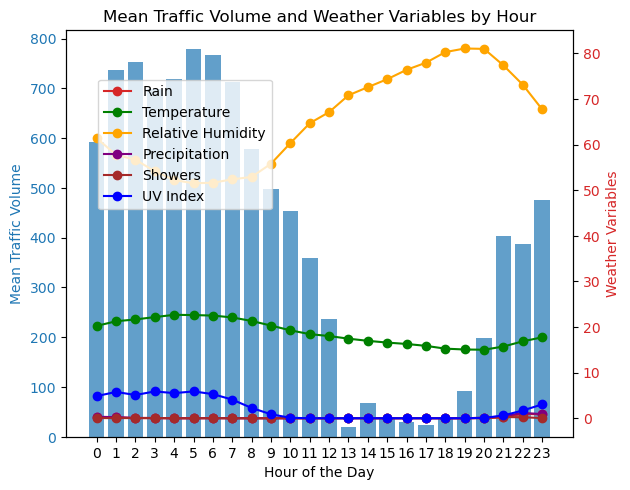

In [151]:

# Convert 'timestamp' column to datetime format
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Extract hour from timestamp
merged_df['hour'] = merged_df['timestamp'].dt.hour

# Group data by hour and calculate mean traffic volume and mean weather variables
hourly_data = merged_df.groupby('hour').agg({
    'total_of_directions': 'mean', 
    'rain': 'mean', 
    'temperature_2m': 'mean', 
    'relative_humidity_2m': 'mean', 
    'precipitation': 'mean', 
    'showers': 'mean', 
    'uv_index': 'mean'
})

# Plot bar chart
fig, ax1 = plt.subplots()

# Bar for traffic volume
color = 'tab:blue'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Mean Traffic Volume', color=color)
ax1.bar(hourly_data.index, hourly_data['total_of_directions'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for weather variables
ax2 = ax1.twinx()  

# Line plot for rain
color = 'tab:red'
ax2.set_ylabel('Weather Variables', color=color)
ax2.plot(hourly_data.index, hourly_data['rain'], color=color, linestyle='-', marker='o', label='Rain')
ax2.plot(hourly_data.index, hourly_data['temperature_2m'], color='green', linestyle='-', marker='o', label='Temperature')
ax2.plot(hourly_data.index, hourly_data['relative_humidity_2m'], color='orange', linestyle='-', marker='o', label='Relative Humidity')
ax2.plot(hourly_data.index, hourly_data['precipitation'], color='purple', linestyle='-', marker='o', label='Precipitation')
ax2.plot(hourly_data.index, hourly_data['showers'], color='brown', linestyle='-', marker='o', label='Showers')
ax2.plot(hourly_data.index, hourly_data['uv_index'], color='blue', linestyle='-', marker='o', label='UV Index')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.88))

# Show plot
plt.title('Mean Traffic Volume and Weather Variables by Hour')
plt.xticks(range(24))
plt.show()


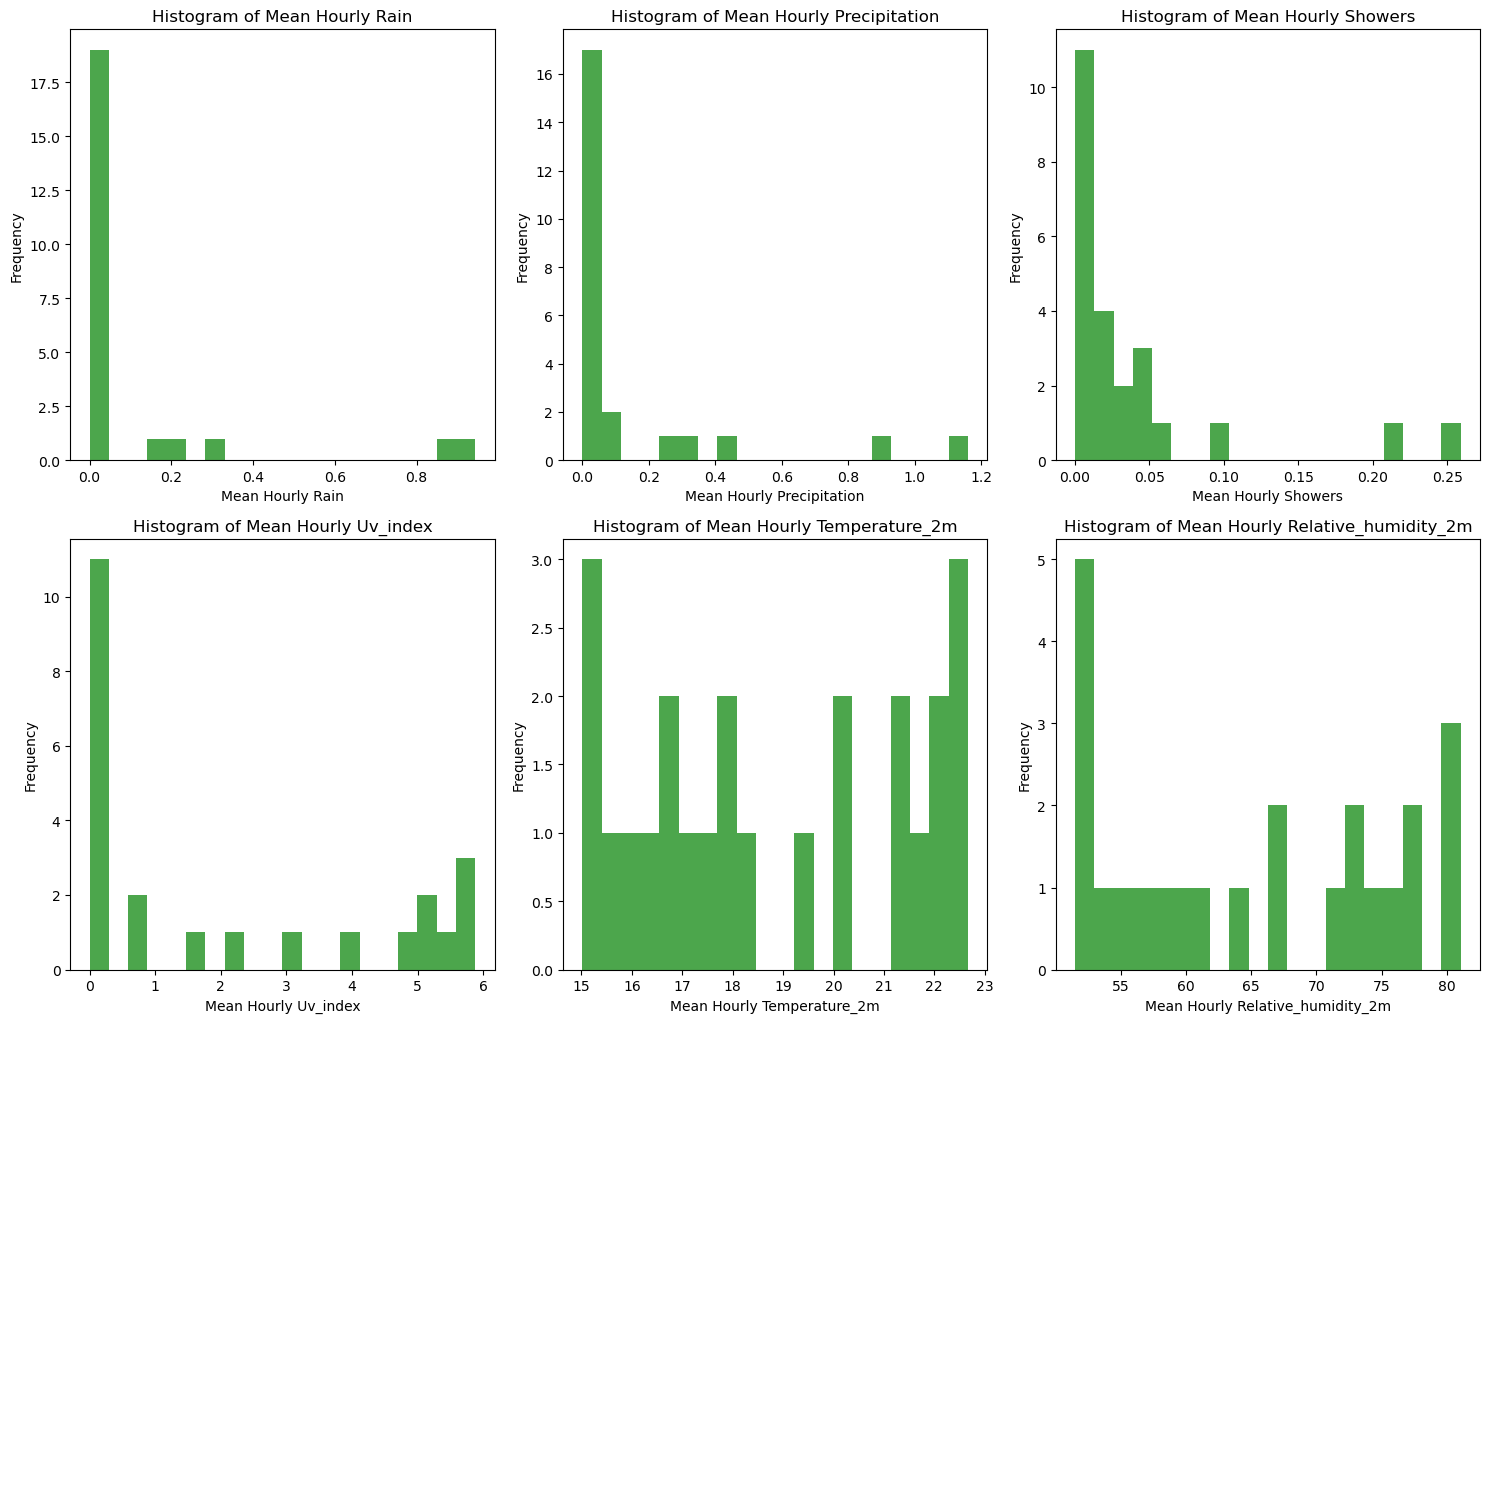

In [152]:
# Extract hour from timestamp
merged_df['hour'] = merged_df['timestamp'].dt.hour

# Define precipitation measures
precipitation_measures = ['rain', 'precipitation', 'showers','uv_index','temperature_2m','relative_humidity_2m'] 

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over precipitation measures
for i, measure in enumerate(precipitation_measures):
    # Group data by hour and calculate mean for the current precipitation measure
    hourly_data = merged_df.groupby('hour')[measure].mean()
    
    # Plot histogram of mean hourly precipitation
    axes[i].hist(hourly_data, bins=20, color='green', alpha=0.7)
    axes[i].set_xlabel(f'Mean Hourly {measure.capitalize()}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Mean Hourly {measure.capitalize()}')

# Hide empty subplots (if any)
for ax in axes[len(precipitation_measures):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


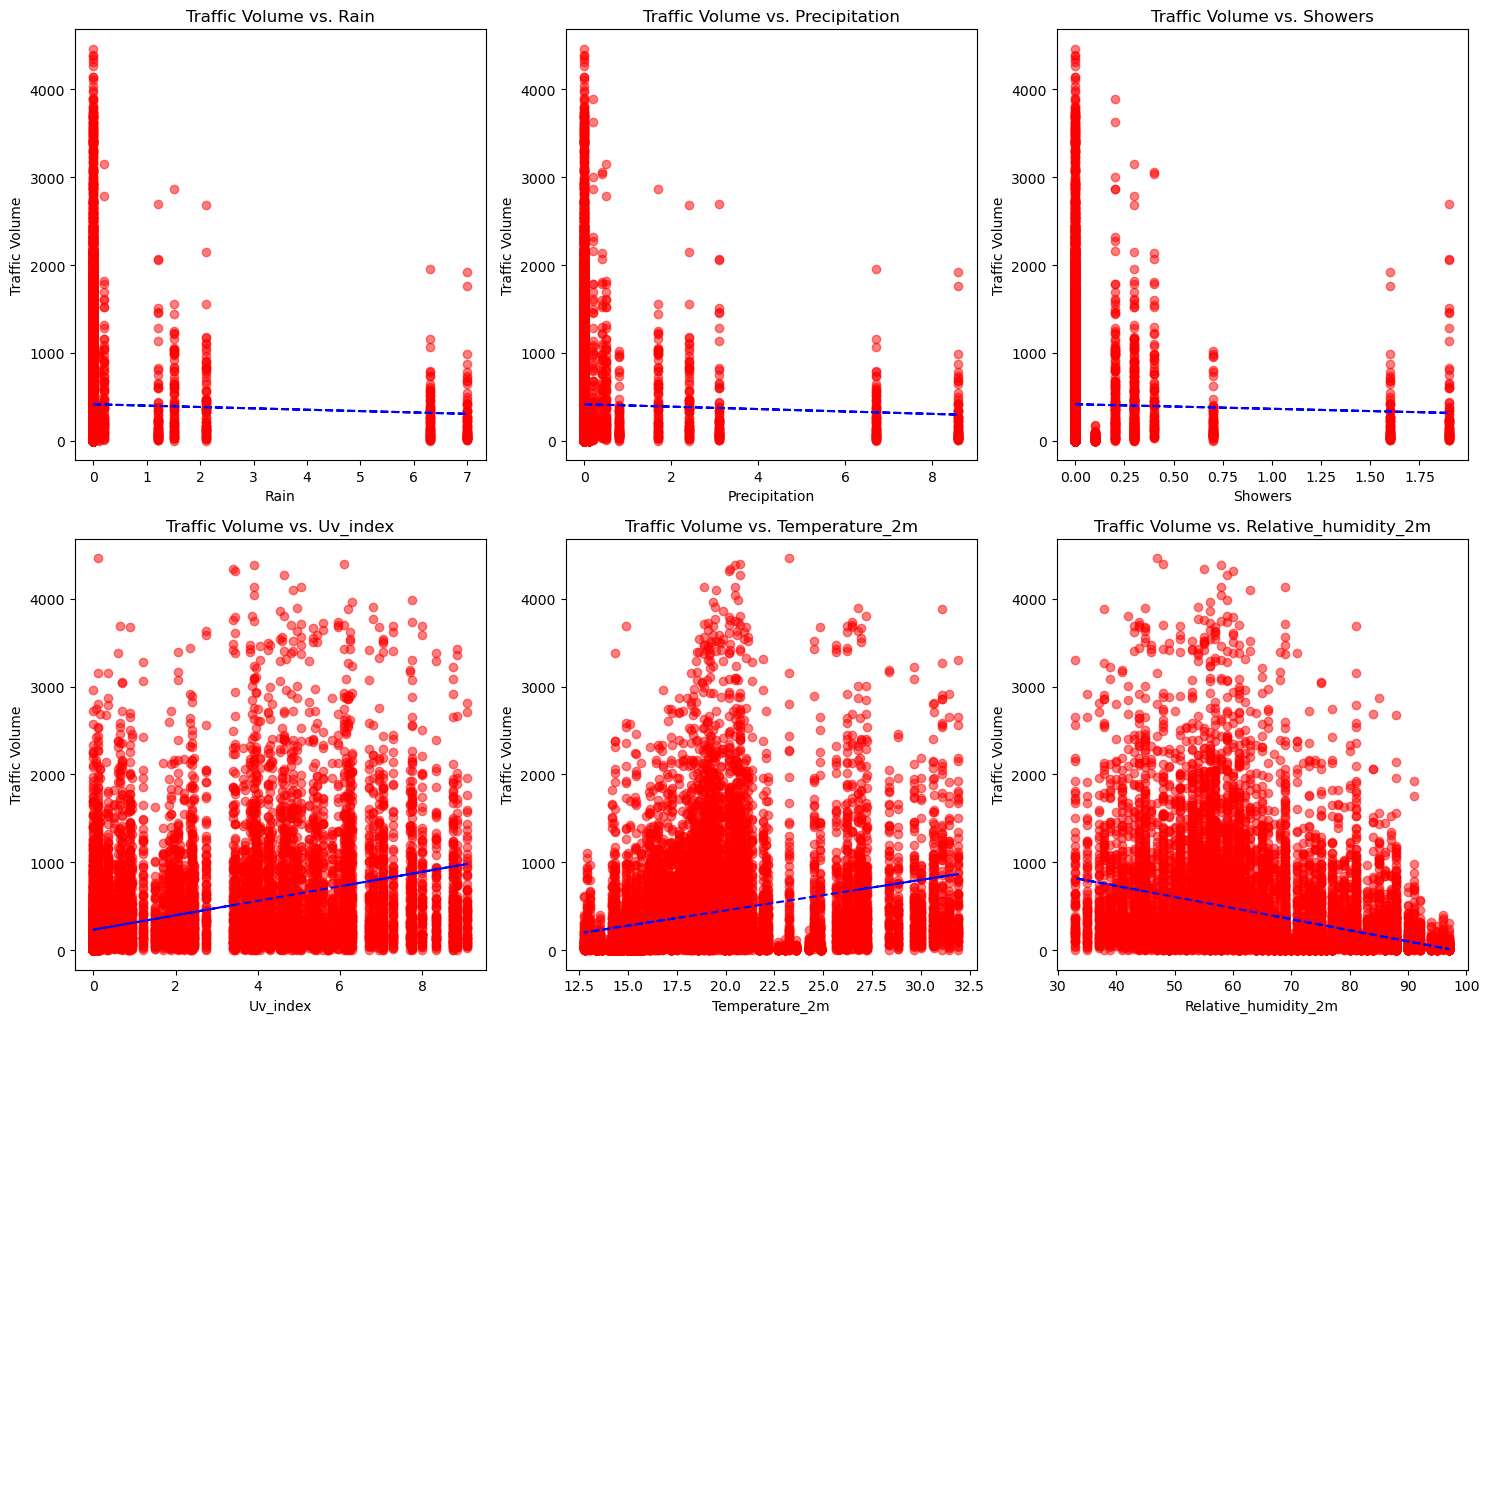

In [153]:
import numpy as np
from scipy.stats import linregress

# Define function to calculate regression line
def plot_trend_line(x, y, ax):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept
    ax.plot(x, line, color='blue', linestyle='--', label=f'Trend Line (R²={r_value**2:.2f})')

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over precipitation measures
for i, measure in enumerate(precipitation_measures):
    # Scatter plot of traffic volume vs. the current precipitation measure
    axes[i].scatter(merged_df[measure], merged_df['total_of_directions'], color='red', alpha=0.5)
    axes[i].set_xlabel(measure.capitalize())  # Set x-axis label
    axes[i].set_ylabel('Traffic Volume')  # Set y-axis label
    axes[i].set_title(f'Traffic Volume vs. {measure.capitalize()}')  # Set title
    
    # Calculate and plot trend line
    plot_trend_line(merged_df[measure], merged_df['total_of_directions'], axes[i])

# Hide empty subplots (if any)
for ax in axes[len(precipitation_measures):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [154]:
# Assuming your DataFrame is named merged_df
unique_locations_count = pedestrian_sensor_locations[['latitude', 'longitude']].nunique()
print(unique_locations_count)


latitude     136
longitude    136
dtype: int64


In [157]:
# Assuming you have imported pandas library and loaded your data into a DataFrame named merged_df

# Get unique location IDs
unique_location_ids = pedestrian_sensor_locations['location_id'].unique()

# Create a DataFrame to display the unique location IDs as a table
import pandas as pd
location_ids_table = pd.DataFrame({'Location IDs': unique_location_ids})

# Display the table
print(location_ids_table)


     Location IDs
0              24
1              25
2              36
3              37
4              41
..            ...
133           149
134           151
135           153
136           156
137           159

[138 rows x 1 columns]


In [158]:
# Iterate over each location ID and filter data
filtered_data_by_location = {}  # Dictionary to store filtered data for each location ID

for index, row in location_ids_table.iterrows():
    location_id = row['Location IDs']
    filtered_data_by_location[location_id] = merged_df[merged_df['location_id'] == location_id]

# Display the filtered data for each location ID
for location_id, data in filtered_data_by_location.items():
    print(f"Data for Location ID: {location_id}")
    print(data)
    print()  # Add a blank line for better readability

Data for Location ID: 24
                       timestamp  location_id  latitude   longitude  \
80068  2024-01-16 00:00:00+00:00           24 -37.81888  144.954492   
80236  2024-01-16 01:00:00+00:00           24 -37.81888  144.954492   
80404  2024-01-16 02:00:00+00:00           24 -37.81888  144.954492   
80572  2024-01-16 03:00:00+00:00           24 -37.81888  144.954492   
80740  2024-01-16 04:00:00+00:00           24 -37.81888  144.954492   
...                          ...          ...       ...         ...   
107452 2024-01-22 19:00:00+00:00           24 -37.81888  144.954492   
107620 2024-01-22 20:00:00+00:00           24 -37.81888  144.954492   
107788 2024-01-22 21:00:00+00:00           24 -37.81888  144.954492   
107956 2024-01-22 22:00:00+00:00           24 -37.81888  144.954492   
108124 2024-01-22 23:00:00+00:00           24 -37.81888  144.954492   

        direction_1_x  direction_2_x  total_of_directions direction_1_y  \
80068           603.0          338.0           

In [164]:
import pandas as pd

# Create an empty list to store DataFrames
dfs = []

# Iterate over each location ID and analyze the data
for location_id, data in filtered_data_by_location.items():
    # Analyze traffic patterns
    total_traffic_count = data['total_of_directions'].sum()
    direction_1_traffic = data['direction_1_x'].sum()
    direction_2_traffic = data['direction_2_x'].sum()
    
    # Analyze climate data
    avg_temperature = data['temperature_2m'].mean()
    avg_humidity = data['relative_humidity_2m'].mean()
    total_precipitation = data['precipitation'].sum()
    
    # Create a DataFrame for each location with the analyzed data
    analysis_df = pd.DataFrame({'Location ID': [location_id],
                                'Total Traffic Count': [total_traffic_count],
                                'Direction 1 Traffic Count': [direction_1_traffic],
                                'Direction 2 Traffic Count': [direction_2_traffic],
                                'Average Temperature': [avg_temperature],
                                'Average Humidity': [avg_humidity],
                                'Total Precipitation': [total_precipitation]})
    
    # Append the DataFrame to the list
    dfs.append(analysis_df)

# Concatenate all DataFrames in the list vertically
analysis_df = pd.concat(dfs, ignore_index=True)

# Drop any columns that are entirely empty or contain only NA values
analysis_df = analysis_df.dropna(axis=1, how='all')

# Display the DataFrame
print(analysis_df)


     Location ID  Total Traffic Count  Direction 1 Traffic Count  \
0             24             123199.0                    58675.0   
1             25             116978.0                    60798.0   
2             36              38059.0                    19447.0   
3             37               8209.0                     3697.0   
4             41             309913.0                   168561.0   
..           ...                  ...                        ...   
133          149                  0.0                        0.0   
134          151                  0.0                        0.0   
135          153                  0.0                        0.0   
136          156                  0.0                        0.0   
137          159                  0.0                        0.0   

     Direction 2 Traffic Count  Average Temperature  Average Humidity  \
0                      64524.0            18.829155         65.458336   
1                      56180.0       

C:\Users\Dinuk Nadishan\AppData\Local\Temp\ipykernel_29080\2934166149.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  analysis_df = pd.concat(dfs, ignore_index=True)


In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Drop rows with missing values
analysis_df = analysis_df.dropna()

# Select features and target
X = analysis_df[['Average Temperature', 'Average Humidity', 'Total Precipitation']]
y = analysis_df['Total Traffic Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 69909.74172794117
Mean Squared Error: 9853084631.858814
R-squared: -0.3167002104540657



#Dinuk Edited
_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [156]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">{Use Case Name}</div>

<div class="usecase-authors"><b>Authored by: </b> {Author/s}</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```